In [154]:
# importing necessary libraries.
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import numpy as np
# import seaborn as sns

In [155]:
# importing dataset....
batsman_t20 = pd.read_csv('batsman data t20i.csv')
batsman_t20.head()

,Player Name,Country,Time Period,Matches,Played,Not Outs,Runs,Highest Score,Batting Average,Balls Faced,Strike Rate,Centuries,Fifties,Ducks,Fours,Sixes
0,V Kohli,India,2016-2022,10,9,4,429,122,85.80,325,132.00,1,3,1,40,11
1,Mohammad Rizwan,Pakistan,2022-2022,6,6,1,281,78,56.20,239,117.57,0,3,0,21,6
2,RG Sharma,India,2016-2022,9,9,0,271,83,30.11,192,141.14,0,2,1,27,12
3,Babar Hayat,Hong Kong,2016-2022,5,5,0,235,122,47.00,160,146.87,1,1,1,22,10
4,Ibrahim Zadran,Afghanistan,2022-2022,5,5,2,196,64,65.33,188,104.25,0,1,0,14,4


In [156]:
features = ['Player Name','Batting Average','Strike Rate','Runs', 'Not Outs'] # features considered.
batsman_t20 = batsman_t20.dropna(subset=features) # remove rows not dont have numerical value from the features.
batsman_t20 = batsman_t20[features].copy()
batsman_t20

,Player Name,Batting Average,Strike Rate,Runs,Not Outs
0,V Kohli,85.80,132.00,429,4
1,Mohammad Rizwan,56.20,117.57,281,1
2,RG Sharma,30.11,141.14,271,0
3,Babar Hayat,47.00,146.87,235,0
4,Ibrahim Zadran,65.33,104.25,196,2
5,PBB Rajapaksa,47.75,149.21,191,2
6,Sabbir Rahman,36.20,122.29,181,1
7,Muhammad Usman,29.33,118.12,176,1
8,Najibullah Zadran,35.20,157.14,176,3
9,P Nissanka,34.60,115.33,173,1


In [157]:
batsman_t20 = batsman_t20.drop(38) # removing incorrect data
batsman_t20

,Player Name,Batting Average,Strike Rate,Runs,Not Outs
0,V Kohli,85.80,132.00,429,4
1,Mohammad Rizwan,56.20,117.57,281,1
2,RG Sharma,30.11,141.14,271,0
3,Babar Hayat,47.00,146.87,235,0
4,Ibrahim Zadran,65.33,104.25,196,2
5,PBB Rajapaksa,47.75,149.21,191,2
6,Sabbir Rahman,36.20,122.29,181,1
7,Muhammad Usman,29.33,118.12,176,1
8,Najibullah Zadran,35.20,157.14,176,3
9,P Nissanka,34.60,115.33,173,1


In [158]:
# scaling the data.
scaler = StandardScaler()
features = ['Batting Average','Strike Rate','Runs', 'Not Outs']
scaled_data = pd.DataFrame( scaler.fit_transform(batsman_t20[features]) , columns = features )
pca = PCA(2)
df = pca.fit_transform(scaled_data)
len(df)

48

In [159]:
''' To find how many clusers are to be formed '''
def elbow_plot( min_k, max_k, k_max_iter):
    sum_squared_distances = []
    k_range = range(min_k,max_k+1)
    for k in k_range:
        km = KMeans(n_clusters=k, max_iter=k_max_iter, n_init=50)
        km.fit(df)
        sum_squared_distances.append(km.inertia_)
        
    # Plot the score for each value of k
    plt.plot(k_range, sum_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

In [160]:
# elbow_plot(2,12,50)

In [161]:
# Clustering the players using k-means algorithm
km = KMeans(n_clusters=3,n_init=50)
label = km.fit_predict(df)
scaled_data['Cluster'] = km.labels_ # assigning the cluster number for each datapoint in the dataframe.
scaled_data['Cluster'].value_counts()
label

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 2, 2, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0])

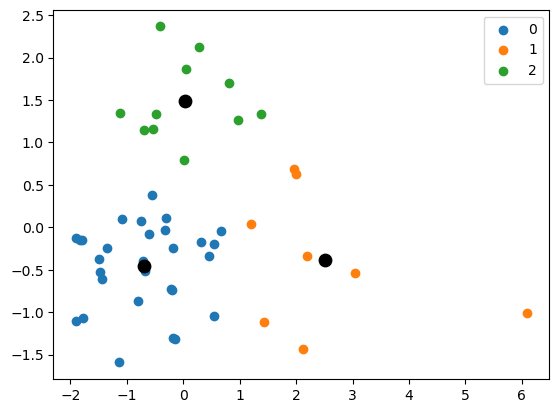

In [162]:
centroids = km.cluster_centers_
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label==i,0],df[label==i,1], label=i)
plt.scatter(centroids[:,0], centroids[:,1], s=80, color = 'k')
plt.legend()
plt.show()

In [163]:
scaled_data.insert(0,'Player Name',batsman_t20['Player Name']) # adding player name to the cluster...
scaled_data

,Player Name,Batting Average,Strike Rate,Runs,Not Outs,Cluster
0,V Kohli,3.387543,0.454926,4.352184,2.968740,1
1,Mohammad Rizwan,1.554856,-0.227123,2.210757,0.099622,1
2,RG Sharma,-0.060509,0.886938,2.066066,-0.856751,2
3,Babar Hayat,0.985237,1.157773,1.545179,-0.856751,2
4,Ibrahim Zadran,2.120141,-0.856707,0.980884,1.055995,1
5,PBB Rajapaksa,1.031673,1.268375,0.908539,1.055995,1
6,Sabbir Rahman,0.316554,-0.004027,0.763848,0.099622,0
7,Muhammad Usman,-0.108803,-0.201127,0.691502,0.099622,0
8,Najibullah Zadran,0.254639,1.643195,0.691502,2.012367,1
9,P Nissanka,0.217490,-0.332999,0.648095,0.099622,0


In [164]:
# spliting the dataframe into diffrent clusters.
b0 = scaled_data.loc[scaled_data['Cluster']==0]
b1 = scaled_data.loc[scaled_data['Cluster']==1]
b2 = scaled_data.loc[scaled_data['Cluster']==2]

In [165]:
len(b0)

29

In [166]:
len(b1)

8

In [167]:
len(b2)

11

In [168]:
b1

,Player Name,Batting Average,Strike Rate,Runs,Not Outs,Cluster
0,V Kohli,3.387543,0.454926,4.352184,2.968740,1
1,Mohammad Rizwan,1.554856,-0.227123,2.210757,0.099622,1
4,Ibrahim Zadran,2.120141,-0.856707,0.980884,1.055995,1
5,PBB Rajapaksa,1.031673,1.268375,0.908539,1.055995,1
8,Najibullah Zadran,0.254639,1.643195,0.691502,2.012367,1
10,Mahmudullah,1.645252,0.918134,0.648095,2.968740,1
21,Sarfaraz Ahmed,1.821091,0.365121,-0.104298,0.099622,1
22,Shoaib Malik,1.821091,-0.488977,-0.104298,1.055995,1
